In [43]:
import numpy as np
import pandas as pd
import random
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn
from sklearn.cluster import KMeans  # for clustering
from bokeh.io import output_notebook, show, reset_output
import bokeh
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [2]:
eyetracking_data = pd.read_csv('metro_data.csv', encoding = 'latin1', sep = ";")
eyetracking_data.head()

,Timestamp,StimuliName,FixationIndex,FixationDuration,MappedFixationPointX,MappedFixationPointY,user,description
0,2586,01_Antwerpen_S1.jpg,9,250,1151,458,p1,color
1,2836,01_Antwerpen_S1.jpg,10,150,1371,316,p1,color
2,2986,01_Antwerpen_S1.jpg,11,283,1342,287,p1,color
3,3269,01_Antwerpen_S1.jpg,12,433,762,303,p1,color
4,3702,01_Antwerpen_S1.jpg,13,183,624,297,p1,color


In [3]:
#dataframe of Antwerper_s1 stimulus only
Antwerpen_s1 = eyetracking_data[eyetracking_data['StimuliName'] == '01_Antwerpen_S1.jpg']
Antwerpen_s1.head()

,Timestamp,StimuliName,FixationIndex,FixationDuration,MappedFixationPointX,MappedFixationPointY,user,description
0,2586,01_Antwerpen_S1.jpg,9,250,1151,458,p1,color
1,2836,01_Antwerpen_S1.jpg,10,150,1371,316,p1,color
2,2986,01_Antwerpen_S1.jpg,11,283,1342,287,p1,color
3,3269,01_Antwerpen_S1.jpg,12,433,762,303,p1,color
4,3702,01_Antwerpen_S1.jpg,13,183,624,297,p1,color


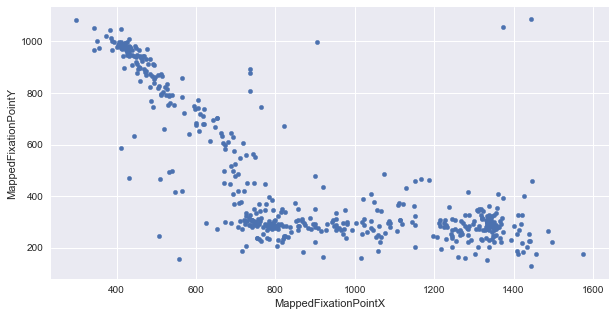

In [4]:
Antwerpen_s1.plot(kind='scatter', x='MappedFixationPointX', y='MappedFixationPointY');

In [11]:
n_clusters = int(input()) #could become slider option

3


In [12]:
#k-means clustering algorithm
X_km = Antwerpen_s1[['MappedFixationPointX', 'MappedFixationPointY']].copy()
km = KMeans(n_clusters)
km.fit(X_km)
centers = pd.DataFrame(km.cluster_centers_, columns=X_km.columns)
X_km['cluster'] = km.labels_
X_km = X_km.reset_index()

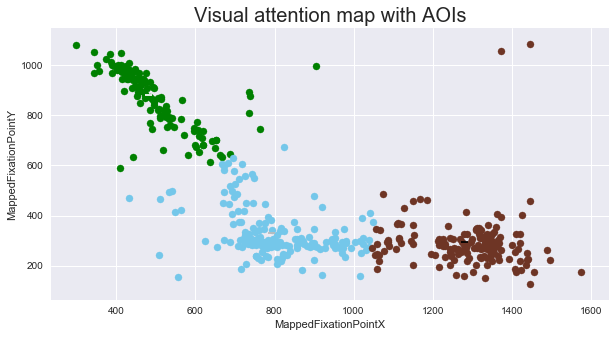

In [60]:
#need to implement to get as many of these line as the number of clusters
ax = X_km[X_km['cluster']==0].plot(kind='scatter', x='MappedFixationPointX', y='MappedFixationPointY', s=50, c='green', sharex=False)
for n in range(1, n_clusters):
    r = random.random()
    b = random.random()
    g = random.random()
    c = (r, g, b)
    X_km[X_km['cluster']==n].plot(kind='scatter',x='MappedFixationPointX',y='MappedFixationPointY',s=50, c=c, sharex=False, ax = ax)

ax.set_title('Visual attention map with AOIs', size=20)
centers.plot(kind = 'scatter', x='MappedFixationPointX', y='MappedFixationPointY', s=50, marker=False, sharex=False, ax=ax)

In [13]:
#creating empty matrix: n_clusters × n_clusters
matrix = []
AOI = []
count = 0
for i in range (0, n_clusters):
    matrix.append([])
    AOI.append(count+1)
    count += 1
for i in range (0, n_clusters):
    for j in range (0, n_clusters):
        matrix[i].append(j)
        matrix[i][j] = 0

In [14]:
#transition matrix
cluster = X_km.loc[0, 'cluster']
for n in range(1, X_km.index[-1]):
    cluster_compare = X_km.loc[n, 'cluster']
    if cluster != cluster_compare:
        matrix[cluster][cluster_compare] = matrix[cluster][cluster_compare]+1
    cluster = cluster_compare
    
matrix = np.array(matrix)
pd.DataFrame(matrix, index=AOI, columns=AOI)

,1,2,3
1,0,22,21
2,33,0,41
3,10,52,0


In [15]:
#normalizing the matrix by dividing every cell by the maximum amount of transitions
max_trans = np.amax(matrix)
norm_matrix = (1/max_trans) * matrix
df_norm_matrix = pd.DataFrame(norm_matrix, index=AOI, columns=AOI)
df_norm_matrix

,1,2,3
1,0.000000,0.423077,0.403846
2,0.634615,0.000000,0.788462
3,0.192308,1.000000,0.000000


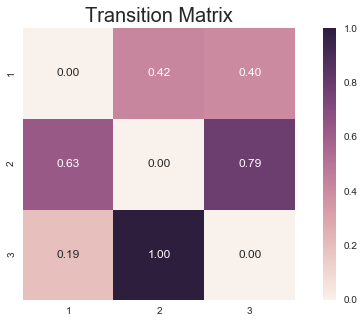

In [25]:
#transition matrix heatmap
fig, ax = plt.subplots(squeeze=False)
ax[0,0].set_title('Transition Matrix', size=20)
sns.heatmap(df_norm_matrix, square=True, annot=True, fmt=".2f");